#Word2Vec
Word2Vec is a word embedding technique in natural language processing (NLP) that allows words to be represented as vectors in a continuous vector space. Researchers at Google developed word2Vec that maps words to high-dimensional vectors to capture the semantic relationships between words. It works on the principle that words with similar meanings should have similar vector representations. Word2Vec utilizes two architectures:

1. CBoW(Continious Bag of Words): The CBOW model predicts the current word given context words within a specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the dimensions we want to represent the current word present at the output layer.
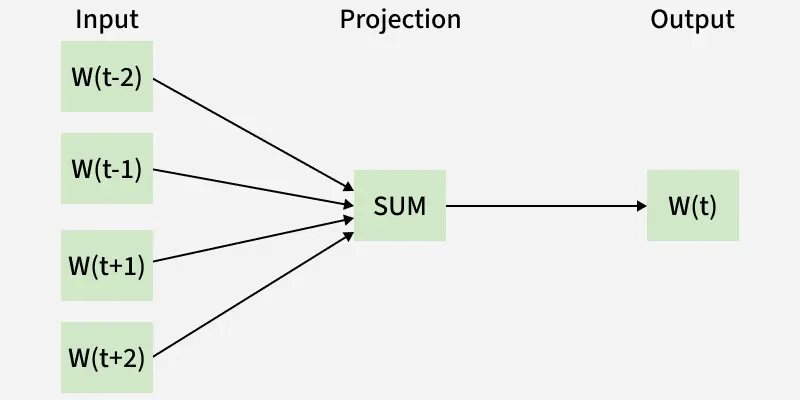

2.   Skip Gram
The Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer
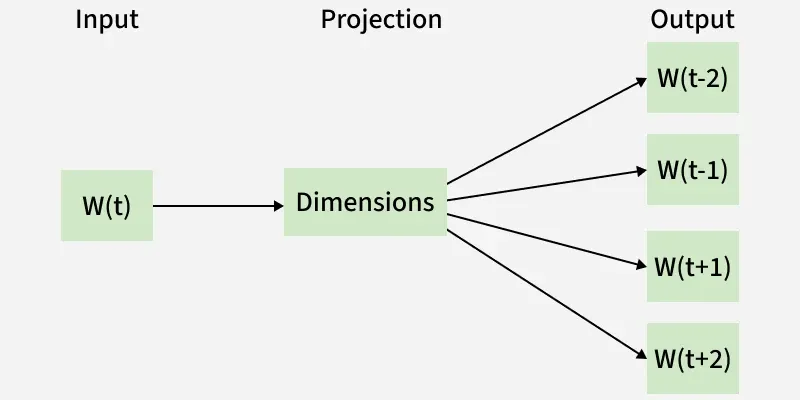

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.4 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim.models import Word2Vec
import spacy
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
nlp = spacy.load("en_core_web_sm")

def preprocess_spacy(text):
  doc = nlp(text.lower())
  tokens = [
            token.lemma_                                #Lematization
            for token in doc
            if not token.is_stop                      #not stop word
            and not token.is_punct              #not punctuation
            and token.is_alpha                     # alphabet
  ]

  return tokens

sentences = df['Message'].tolist()

corpus = [preprocess_spacy(text) for text in sentences]

In [ ]:
model = Word2Vec(
    sentences=corpus,     # tokenized corpus
    vector_size=100,      # embedding dimension
    window=5,             # context window
    min_count=1,          # ignore rare words
    sg=1,                           # 1=Skip-gram, 0=CBOW
    workers=4             # number of CPU cores
)


In [ ]:
print(model.wv['phone'])                # show embedding vector
print(model.wv.most_similar('mobile'))        # find most similar words
print(model.wv.similarity('phone', 'water'))


[-0.04934004  0.19360419  0.19135433  0.32023296 -0.34595263 -0.42163798
  0.03843305  0.76039374  0.05483946 -0.5331152  -0.18956402 -0.25378868
 -0.25383365  0.90947205 -0.27171755 -0.29350793 -0.14217806 -0.4275865
 -0.6695808  -0.51953787 -0.27907065 -0.10123346 -0.1850426  -0.18750419
 -0.39017713 -0.10814519  0.05819435 -0.31499633  0.25554985 -0.26329193
 -0.16591355 -0.18555862  0.46477172  0.00620975  0.25936016  0.4611221
  0.3018883   0.6491878  -0.37929612  0.16687685 -0.1050769  -0.49350798
  0.01729563 -0.47078413 -0.5885207  -0.5632293   0.1334627  -0.0993892
 -0.10964008  0.552946    0.49415556  0.400918   -0.00485145 -0.2312959
 -0.3997609  -0.10139718  0.23235543 -0.13294128 -0.1995589   0.18881117
  0.5475746  -0.16114308 -0.38308945  0.37860134  0.08635298  0.15970936
  0.08750721  0.20869693  0.22677776  0.12207818  0.10592423  0.26906875
 -0.08883499 -0.5509926   0.33443204 -0.78842473 -0.26992956 -0.14387465
 -0.20709918 -0.07900842 -0.05505206 -0.57098293  0.017

#FastText

FastText is based on the idea of subword embeddings, which means that instead of representing words as single entities, FastText breaks them down into smaller components called character n-grams. By doing so, FastText can capture the semantic meaning of morphologically related words, even for out-of-vocabulary words or rare words, making it particularly useful for handling languages with rich morphology or for tasks where out-of-vocabulary words are common.
Each word is represented not only by the word itself, but also by its character-level n-grams

```
word: "apple"

subwords (3-grams): <ap, app, ppl, ple, le>

```
(FastText actually adds special boundary symbols < and > to mark word edges.)

Then FastText learns embeddings for:

1. Each subword (like app, ppl, ple)

2. The whole word itself

In the context of FastText embeddings, both Skip-gram and Continuous Bag of Words (CBOW) serve as training methodologies to generate word representations.


In [ ]:
from gensim.models import FastText
model = FastText(
    sentences=corpus,
    vector_size=100,   # embedding dimension
    window=5,          # context window size
    min_count=1,       # ignore words with frequency < 1
    sg=1,              # 1 = skip-gram; 0 = CBOW
    epochs=10
)

In [ ]:
# Get vector for a word
#print(model.wv["learning"])

# Find most similar words
print(model.wv.most_similar("bad"))

[('thought', 0.9964525103569031), ('noooooooo', 0.9959792494773865), ('nooooooo', 0.9954619407653809), ('be', 0.9954315423965454), ('bed', 0.9953746795654297), ('sooooo', 0.9948725700378418), ('nig', 0.9944334030151367), ('behave', 0.9941841959953308), ('nike', 0.9940416812896729), ('ooooooh', 0.9940213561058044)]
